# <center>Digital Image Processing - Problem Set 2</center>

### Student Names:
* Karolay Ardila Salazar
* Julián Elías Sibaja García
* Andrés Simancas Mateus

### Instructions

This Problem Set covers the topics of Image enhancement in the spatial domain, power law transformations, histogram equalization, smoothing, median filters, image sharpening, Laplacian of an image, image gradients and Sobel operators. <br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

### Definitions

In [2]:
'''This is a definition script, so we do not have to rewrite code'''

import numpy as np
import os
import cv2
import matplotlib.pyplot as mplt
import random


# set matplotlib to print inline (Jupyter)
%matplotlib inline

# path prefix
pth = '../data/'

# files to be used as samples
# list *files* holds the names of the test images
files = sorted(os.listdir(pth))
print files

# Usefull function
def rg(img_path):
    return cv2.imread(pth+img_path, cv2.IMREAD_GRAYSCALE)

['Woman.bmp', 'blurry_moon.png', 'cameraman.png', 'cameraman_new.png', 'ckt_board_saltpep_prob_pt05.png', 'contact_lens_original.png', 'darkPollen.jpg', 'face.png', 'hut.jpg', 'lightPollen.jpg', 'lowContrastPollen.jpg', 'moon.jpg', 'new_cameraman.png', 'pollen.jpg', 'rose.bmp', 'runway.jpg', 'skull.bmp', 'spine.jpg', 'test_pattern_blurring_orig.png']


### Problem 1

Implement the code for the function below, which runs histogram equalization on a grayscale image. Your code should compute the histogram of the image, and use the cdf as a transformation function. The function should return the equalized image as an array. Use the function to do histogram equalization on the images <tt>darkPollen.jpg</tt>, <tt>lightPollen.jpg</tt>, <tt>lowContrastPollen.jpg</tt>, <tt>pollen.jpg</tt>, <tt>spine.jpg</tt> and <tt>runway.jpg</tt>. Include in the report plots and comparisons between the histograms of the corrected images to those of the originals. Also include a plot of the transformation function that equalizes the input histograms. Please comment your results.

Please comment results here.

#### Resultados
Para resolver este punto, se creó una función(histogramEq) que recibe una array(img), de la imagen que a la que se le quiere aplicar la ecualización de histograma, como parametro. A la imagen se le hallan los valores del histograma(hist), con esos valores se construye la cdf para los valores del histograma que no son cero. luego se obtienen los valores de intensidad de píxeles que se encuentran en la imagen (v), para establecer una correspondencia entre estos y la cdf, lo cual se guarda en un diccionario(cdf_v). Luego se aplica la siguiente función a cada valor de píxel en la imagen:

$$ h(x,y) = round\left(\frac{(cdf(v)-cdfmin) \cdot (L-1)}{N \cdot M - 1} \right) $$

Donde $h(x,y)$ es el nuevo valor del píxel, $cdf(v)$ es el valor de la cdf en la intensidad de píxel $v$ que nos regresa el diccionario cdf_v, $cdfmin$ es el valor mínimo de la cdf, $L$ es el valor máximo de intensidades de pixel y $N$ y $M$ son las dimensiones de la array. Despues de lo anterior se devuelve la imagen con la transformación realizada.

Se graficaron las imágenes antes de la transformación y despues, así como sus respectivos histogramas y la cdf.

Se puede ver que las imágenes redistribuyeron su histograma en los casos en los que había una preferencia hacia un lado del espectro, como es el caso de <tt>runway.jpg</tt> y <tt>lowContrastPollen.jpg</tt>, sus imágenes resultantes se persiven con mayores detalles luego de su transformación. En otros casos como en el de <tt>pollen.jpg</tt> en el que su histograma se encontraba bien distribuído, los cambios que realizó la transformación no contribuyerón a arreglar el aspecto de la imágen, ya que la función regresó una imágen similar a la de entrada. En el caso de <tt>spine.jpg</tt> en el que los valores de intensidad de pixel se encuentran casi en el limite inferior del espectro , solo movió los valores más al centro, pero incluso con este histograma la imágen transformada permite percibir mejor los detalles de la espina.


darkPollen.jpg


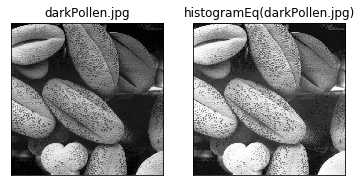

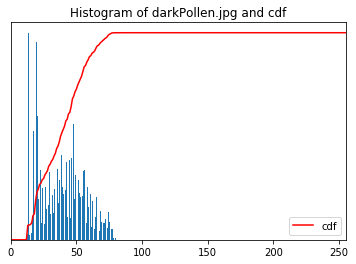

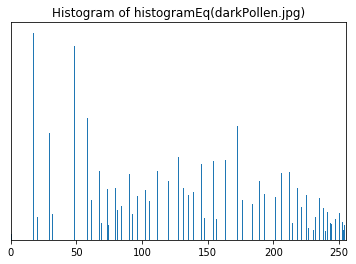

lightPollen.jpg


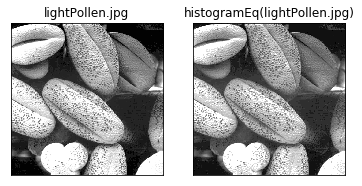

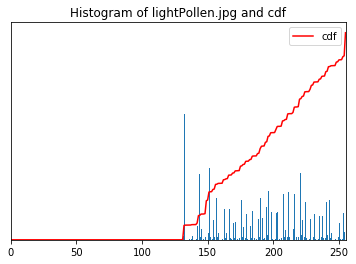

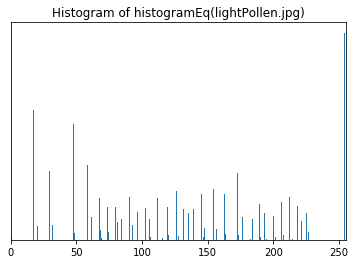

lowContrastPollen.jpg


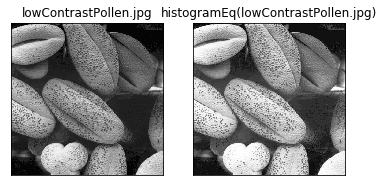

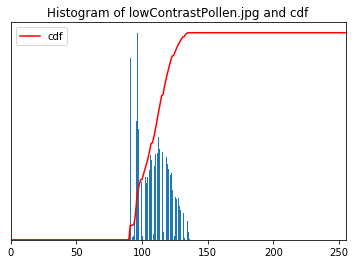

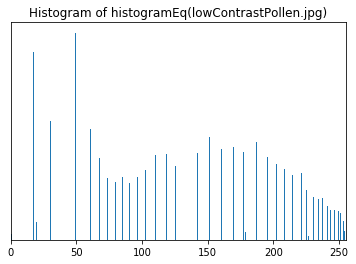

pollen.jpg


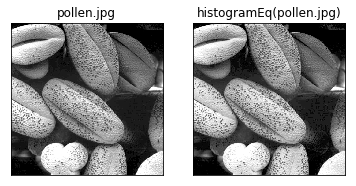

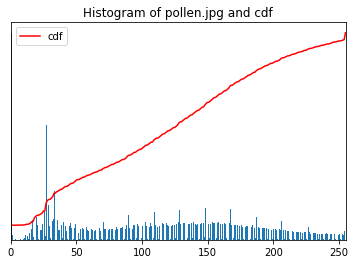

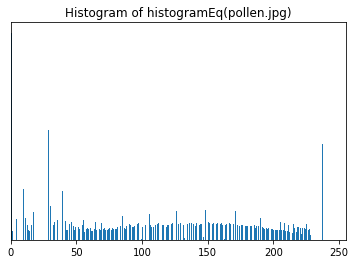

runway.jpg


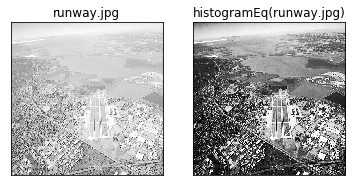

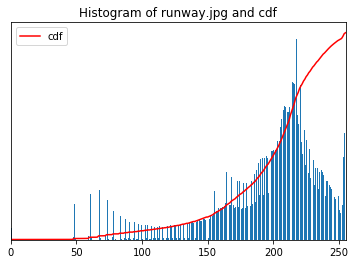

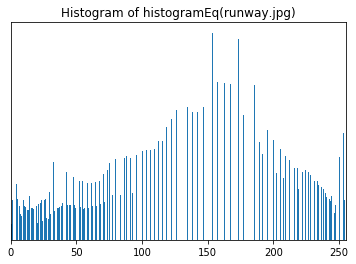

spine.jpg


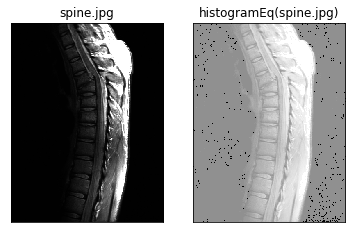

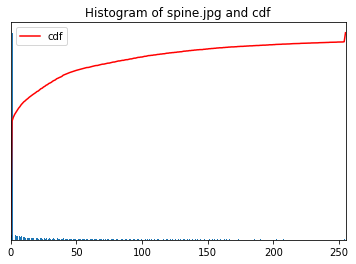

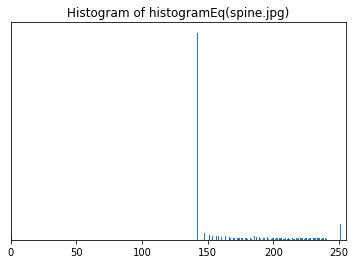

In [32]:
def histogramEq(img):
    """ Function that runs histogram equalization in an image array
            Input arguments
            img: image array
        Output
            img: The image array with histogram equalization      
    """
    
    hist,_ = np.histogram(img,256,[0,256])
    histl = list(hist.flatten())
    
    cdf = np.cumsum(filter(lambda a: a != 0, list(histl)))
    v = list(set(img.flatten()))
    v = sorted(v)
    cdf_v = {}
    for i in range(0,len(v)):
        cdf_v[v[i]] = cdf[i]
    N = img.shape[0]
    M = img.shape[1]
    cdf_min = min(cdf)
    img = np.array(img)
    for i in range(0,N):
        for j in range(0,M):
            img[i][j]= round(((cdf_v.get(img[i][j])-cdf_min)*(255))/(M*N-1))
    return img
            
    
for i in [6,9,10,13,15,17]:
    print(files[i])
    img = rg(files[i])
    imgh = histogramEq(rg(files[i]))
    mplt.figure()
    mplt.subplot(121)
    mplt.imshow(rg(files[i]), cmap='gray'),mplt.title(files[i]),mplt.yticks([]),mplt.xticks([])
    mplt.subplot(122)
    mplt.imshow(imgh, cmap='gray'),mplt.title("histogramEq("+files[i]+")"),mplt.yticks([]),mplt.xticks([])
    mplt.show(block = False)
    mplt.figure()
    hist, bins = np.histogram(img.flatten(),256,[0,256])
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    cdf = hist.cumsum()
    cdf_n = cdf*hist.max()/ cdf.max()
    mplt.bar(center, hist, align='center', width=width),mplt.title("Histogram of "+files[i]+" and cdf"),mplt.yticks([])
    p_cdf_n, = mplt.plot(cdf_n,color = 'r')
    mplt.legend([p_cdf_n], ['cdf'])
    mplt.xlim( (0, 255) )
    mplt.show(block = False)
    mplt.figure()
    hist, bins = np.histogram(imgh.flatten(),256,[0,256])
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    mplt.bar(center, hist, align='center', width=width),mplt.title("Histogram of histogramEq("+files[i]+")"),mplt.yticks([])
    mplt.xlim( (0, 255) )
    mplt.show(block = False)    

#### Problem 2

Implement the code for the function below which performs a power law transformation on an image. This function should take an image array and the gamma value to be used in the transformation as its only input parameters. The function should return a new image array which is the power transformation of the original image. Power law transformations are achieved using the following formula:
$$ g(x,y) = T[f(x,y)] = c \cdot f(x,y) ^ \gamma $$

where $g(x,y)$ is the output pixel value, $f(x,y)$ is the original pixel value, $\gamma$ is the parameter controlling the power law transformation and $c$ is a constant usually set to 1. Note that you convert the image so that the intensity values are in the range 0.0 – 1.0, rather than in 0 – 255.

Try this new function out on the images <tt>spine.jpg</tt> and <tt>runway.jpg</tt>, experimenting with different values for $\gamma$. Please comment your results.

(Discuss your results after looking at the resulting images)

#### Resultados

Comencemos explicando cómo funciona el código para luego analizar sus resultados. Lo primero que hacemos es guardar en variables las imagenes que vamos a utilizar de prueba con la función rg que está establecida en definitions la cual recibe como argumento el nombre de la imagen y a su vez, escalamos la imagen dividiendo toda la matriz entre 255 para que nos queden valores entre 0 y 1. definimos una función op que recive (gamma, res, img) donde res va a ser el valor resultante que primero tomará el valor de una matriz de unos con el mismo tamaño nxm de la imagen guardados en las variables hg y wd. Como elevar un número a una potencia significa multiplicar por él mismo tantas veces lo diga la potencia, podemos entonces multiplicar las matrices tantas veces diga gamma. Como tomamos el valor de la constante $c = 1$, entonces sólo debemos resolver la potencia. Verificamos que gamma sea mayor que 0 y usando la función multipy de numpy podemos multiplicar punto a punto dos matrices. Para el caso de $gamma = 0$ decimos que el resultado es igual a la matriz de unos que inicialmente definimos. Finalmente definimos nuestra función principal que toma de entrada la imagen y el valor de gamma. Esta función, muestra en pantalla el resultado de probar con distintos gamma las dos imagenes que se usaron de prueba. 

Podemos analizar de los resultados, que a medida que elevamos, la imagen va tomando en sus pixeles valores cada vez más cercanos a cero (negro) a menos que el pixel sea totalmente 1, ya que siempre multiplicado seguira siendo uno, pero para los valores intermedios si notaremos que van convirtiendose en 0 a medida que aumenta gamma, dejando así una imagen casi completamente llena de ceros y unos, como lo vemos en las dos imagenes de prueba.

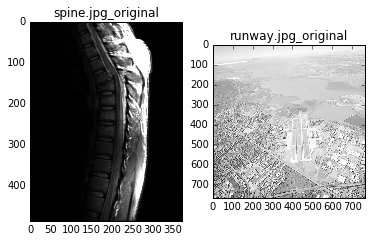

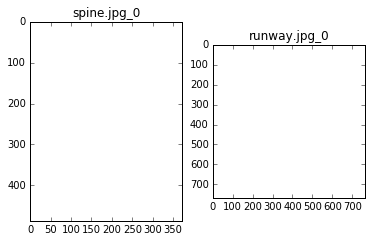

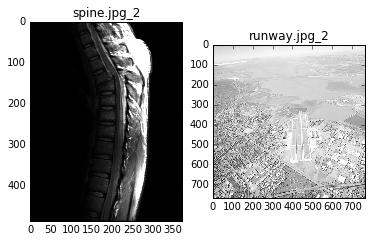

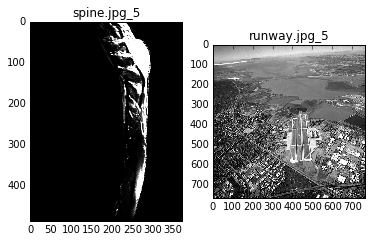

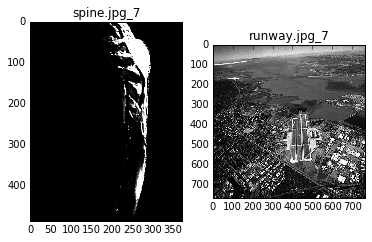

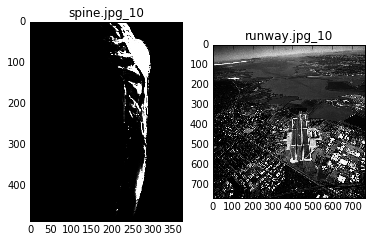

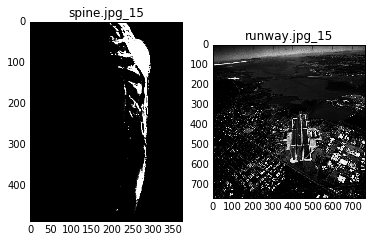

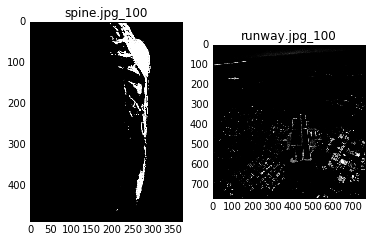

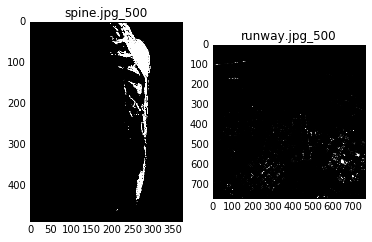

In [115]:
image_1 = (1/255.0)*rg('spine.jpg') # scale images to 0-1.0
image_2 = (1/255.0)*rg('runway.jpg')

hg, wd = image_1.shape 
hg2, wd2 = image_2.shape

gamma = [0, 2, 5, 7, 10, 15, 100, 500] # diferents values for gamma

def op(gamma, res, img):
    for i in range(0, abs(gamma - 1)):
        if gamma > 0:
            res = np.multiply(res, img) # multiply the matix gamma times
        else:
            res = res
    return res

res = np.ones((hg, wd)) # Result when gamma = 0 (matix of ones)
res2 = np.ones((hg2, wd2))

mplt.figure()
mplt.subplot(121)
mplt.imshow(image_1, cmap = 'gray', vmin = 0, vmax = 1) # Original image
mplt.title(files[17]+'_original')
    
mplt.subplot(122)
mplt.imshow(image_2, cmap = 'gray', vmin = 0, vmax = 1)
mplt.title(files[15]+'_original')

def main(img, gamma):
    for k in gamma:
        mplt.figure()
        mplt.subplot(121)
        mplt.imshow(op(k, res, img), cmap = 'gray', vmin = 0, vmax = 1) # Image with transformation
        mplt.title(files[17]+'_'+str(k))
    
        mplt.subplot(122)
        mplt.imshow(op(k, res2, image_2), cmap = 'gray', vmin = 0, vmax = 1)
        mplt.title(files[15]+'_'+str(k))
        
main(image_1, gamma)

### Problem 3

Implement a function that performs smoothing on an input image with an averaging filter mask of size $n$. The function should take two inputs: an image matrix and the filter size $n$. Use the image <tt>test_pattern_blurring_orig.tif</tt> to test your algorithm. Use averaging filter masks of sizes $n = 3, 5, 9, 15, 35$. Analyze the results you obtained.

Para la solución de este problema, sabemos que para aplicar un filtro, por pixel debemos crear una matriz de vecindad con tamaño nxn cuyo valor por casilla sea igual a $\frac{1}{n ^ 2}$ la cual se convolucionará con otra matriz de vecindad que está compuesta por el valor del pixel donde se encuentra como su centro y desde allí creando la matriz vecindad de tamaño nxn. Para esta matriz hemos estipulado que la cantidad de casillas que tendrá a partir del centro será de $\frac{n - 1}{2}$ hacia cada lado, hacia arriba y hacia abajo. Ahora para conocer la posición cada pixel, hemos llegado a la conclución de que, si tomamos s y p como nuestras nuevas coordenadas la fórmula para hayar cada una de ellas sería:

$$ s = centro[x] - \frac{(n - 1)}{2} + i $$
$$ p = centro[y] - \frac{(n - 1)}{2} + j $$

Donde $centro[x]$ y $centro[y]$ son la posición del pixel de interés.
Definimos 3 funciones importantes además de la función principal, estas son $crearmat2$, $hacerOperación$ y $reasignarCentro$. La primera tiene como objetivo crear la vecindad del pixel seleccionado de la imagen con los valores en cada posición, con las formulas de s y p que definimos antes y rellenar con blanco los pixeles que faltan en la matriz de vecindad cuando el centro se encuentra en una esquina o en un borde. La segunda función hace la convolución entre las dos matrices vecindad nxn multiplicando punto a punto estas dos y luego sumando cada valor de posicion como se define en la teoría, este valor que obtenemos al final es el valor de e_pocessed (pixel procesado) que tomara el nuevo valor del pixel en la copia de la imagen original en la posición del mismo. La ultima función simplemente, reasigna en la posición el valor que encontramos en la función anterior. Finalmente, la función $main$ (principal) llama para cada uno de los pixeles de la imagen las tres funciones explicadas anteriormente y luego hace plot a la imagen original junto a la imagen copia que tiene aplicado el filtro. 

Podemos notar en los resultados que a medida que el orden del filtro aumenta, la imagen se va tornando más "borrosa". 
Por último queremos mencionar que el código es un poco demorado, en las pruebas que hicimos aproximadamente tomaba un tiempo de 3.5 minutos pero obtuvimos los resultados deseados. 

Gracias
Gracias
Gracias
Gracias
Gracias


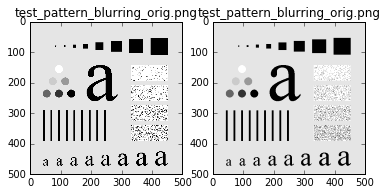

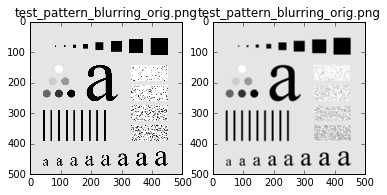

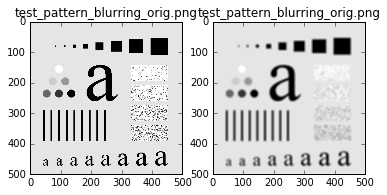

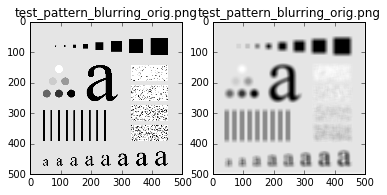

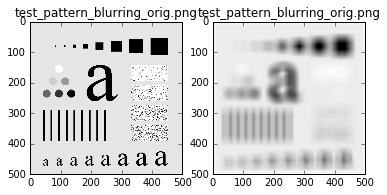

In [12]:
image = rg('test_pattern_blurring_orig.png')

n = [3, 5, 9, 15, 35]

def crear_mat_2(img, n, centro): # Function that create a nxn neighbourhood with the values of the image with a specific center
    hg, wd = img.shape
    mat_2 = np.zeros((n, n))
    
    for i in range (0, n):
        for j in range(0, n):
            s = centro[0] - ((n - 1)/2) + i
            p = centro[1] - ((n - 1)/2) + j
            
            if s < 0 or p < 0 or s > (wd - 1) or p > (hg - 1): # Cases when centre is in a border 
                mat_2[i, j] = 255 # we Pad the image for missing edge pixels with all white pixels (could be black too)
            else:
                mat_2[i, j] = img[s, p]
    return mat_2
                
def hacer_Operacion(mat, mat_2, n): #  we are finding the value of e_processed (product of convolution)    
    a = np.multiply(mat, mat_2)
    a = np.sum(a)
    return a

def reasignar_Centro(num, img_copy, centro): # This function reassign the value num(e_processed) as the new value in the center position
    img_copy[centro[0], centro[1]] = num
    return img_copy[centro[0], centro[1]]

def main(img, n):
    y, x = img.shape
    img_copy = img.copy()
    mat = np.ones((n, n))*(1.0/n**2) # create nxn Filter (will be convolutioned with the original image pixel)
    
    for i in range(0, x):
        for j in range(0, y):
            mat_2 = crear_mat_2(img, n, [i, j])
            num = hacer_Operacion(mat, mat_2, n)
            reasignar_Centro(num, img_copy, [i, j])       
            
    mplt.figure()
    mplt.subplot(121)
    mplt.imshow(img, cmap = 'gray')
    mplt.title(files[18])
    
    mplt.subplot(122)
    mplt.imshow(img_copy, cmap = 'gray')
    mplt.title(files[18])
    print "Gracias" # We wait if we see "Gracias" is not fast but works
    
for k in n:
    main(image, k)

### Problem 4

Consider the image <tt>ckt_board_saltpep_prob_pt05.png</tt>. It has been corrupted with ‘salt-and-pepper’ noise (more formally known as impulse noise). Try to remove the noise from this image by applying a median filter of size 3x3. Compare the result to applying an averaging filter of size 3x3.  Increase the kernel size to 3x3, 5x5, 9x9, 15x15 and repeat. Analyze the results you obtained. Did the filter successfully remove the noise? Did you observe any other side effects?

You can also corrupt any image you like with a salt-and-pepper noise generator. Write another function which adds salt-and-pepper noise to an input image. Use that function to corrupt additional images. Try to recover the original images using a median filter of appropriate size.

(Discuss your results after looking at the resulting images) Analyze the results you obtained. Did the filter successfully remove the noise? Did you observe any other side effects?

#### Resultados
AL comparar el filtro de media con el filtro de mediana con el kernel de tamaño 3, se puede observar que el filtro de mediana no puede eliminar el ruido completamente, mientras que el de medía lo elimina casi por completo. El problema con el de media es que se pierde nitidez cuando se aplica, el filtro de mediana permite ver mayores detalles despues de su aplicación.

Se utilizo la función cv2.medianBlur para aplicar el filtro de media para los tamaño 3, 5, 9, 15. Se puedo observar que a medida que fue aumentando el tamaño del kernel el ruido se reducía más. El filtro no pudo reducir completamente el ruido hasta que fue de tamaño 9 o mayor. A pesar de que entre mayor sea el tamaño del kernel mejor es la reducción del ruido, se pierden detalles en la imagen, lo cual se puede apreciar bien desde el filtro 9 en adelante.

Se creó una función(applySaPN) que añade ruido de impulso, con una probabilidad de 10% de que un píxel sea cambiado a 0 o de 10% de que sea cambiado a 255. Se le aplicó esta función a la imagen <tt>runway.jpg</tt> y el filtro pudo remover el ruido a partir de la aplicación del kernel de tamaño 9. Al igual que con la prueba anterior se pierden detalles a medida que aumenta el tamaño del kernel.

kernel size: 3x3


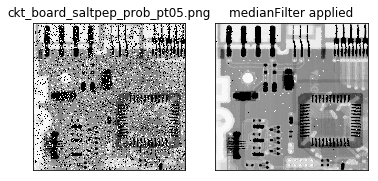

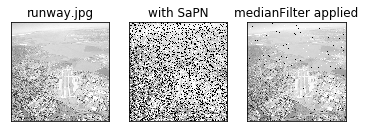

kernel size: 5x5


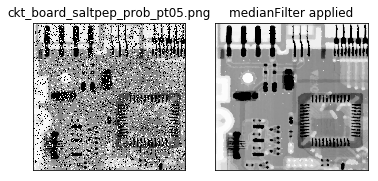

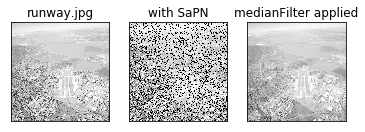

kernel size: 9x9


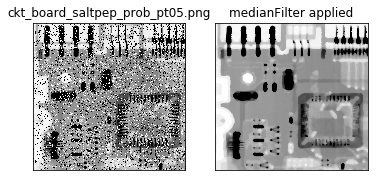

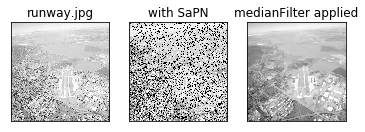

kernel size: 15x15


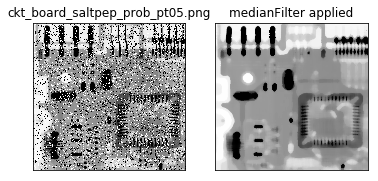

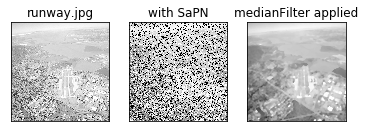

In [3]:
def applySaPN(img,p):
    """ Function that apply Salt and Pepper Noise to an array image
        Input arguments
            img: image array
        Output
            img: The image with Salt and Pepper Noise     
    """
    N = img.shape[0]
    M = img.shape[1]
    for i in range(0,N):
        for j in range(0,M):
            a = random.randint(0,5)
            if a == 0:
                img[i][j]= 0
            if a == 5:
                img[i][j]= 255
                
    return img

for n in [3,5,9,15]:
    print "kernel size: "+str(n)+"x"+str(n)
    k = 4
    img_mf = cv2.medianBlur(rg(files[k]),n)

    mplt.subplot(121),mplt.imshow(rg(files[k]), cmap = 'gray'),mplt.title(files[k])
    mplt.xticks([]), mplt.yticks([])
    mplt.subplot(122),mplt.imshow(img_mf, cmap = 'gray'),mplt.title('medianFilter applied')
    mplt.xticks([]), mplt.yticks([])
    mplt.show()

    c = 15
    img_sapn = applySaPN(rg(files[c]),10)
    img_mf = cv2.medianBlur(img_sapn,n)

    mplt.subplot(131),mplt.imshow(rg(files[c]), cmap = 'gray'),mplt.title(files[c])
    mplt.xticks([]), mplt.yticks([])
    mplt.subplot(132),mplt.imshow(img_sapn, cmap = 'gray'),mplt.title('with SaPN')
    mplt.xticks([]), mplt.yticks([])
    mplt.subplot(133),mplt.imshow(img_mf, cmap = 'gray'),mplt.title('medianFilter applied')
    mplt.xticks([]), mplt.yticks([])
    mplt.show()


### Problem 5 

`1. Write a function that sharpens an image using the Laplacian kernel. Your function should first compute the Laplacian of the input image using the following kernel:
<table>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>-4</td>
<td>1</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
</table>

2. Visualize the Laplacian of the input image. You may consider using a power intensity transformation to enhance the Laplacian image for visualization.

3. Recall that sharpening is achieved by subtraction: $g(x,y) = f(x,y) - \nabla^2 f(x,y) $. Use this method to produce an enhanced image.

4. Recall that subtraction and filtering with a kernel are linear operations. Therefore, it is possible to combine both operations into a single kernel:
<table>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
<tr>
<td>-1</td>
<td> 5</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>-1</td>
<td>0</td>
</tr>
</table>
Write another function that directly sharpens the image using this single kernel.

5. Finally, recall that there is an alternative kernel that can be used to compute a Laplacian: 
<table>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td> -8</td>
<td>1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>
</table>
Write another function that produces a sharpened image using a single enhancement kernel that is based on this alternative definition of the Laplacian.

Apply all the functions you wrote to the image <tt>blurry_moon.png</tt>. Compare, analyze and comment all the results. You are also encouraged to try out your functions on more testing images.

Compare, analyze and comment all the results. You are also encouraged to try out your functions on more testing images.


### Analysis

First notice that the code below is expected to work with several images, so it may look more complicated than it actually is. The script does basically two things:
* sharpening of an image by its subtraction with a basic laplacian filtered,
* direct sharpening using a modified kernel.
This two things are done with a basic kernel and an *extended* kernel.

First we declare the kernel to use as a `numpy array` and correlate each image with it (this is a laplacian filter), then we attempt to perform sharpening by subtraction. Here we encounter a problem. The matrix thrown back by the filter function is not scaled, in intensity, with the original image (in some cases negative values can be expected), this is common problem (according to the little research performed); here we copied one of the proposed solutions (link is provided), what it does is normalize the matrix according to its minimum and maximum values. The obtained matrix is subtracted of each image and the result is displayed. Direct sharpening is trivial, simply call the filter function with the modified kernel and display the results.

The same steps above were repeated for the *extended* kernel.

Looking at the output images, we can say that both sharpening by subtraction and direct sharpening are equally good. The notizable difference is in the color distribution (as a result of the post processing performed to the laplace filter); histogram equalization might fix this. From comparing normal filter with extended it is evident that the extended one gives sharper (and more detailed) results.

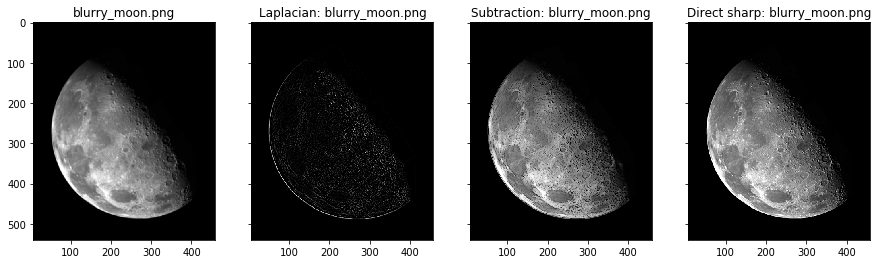

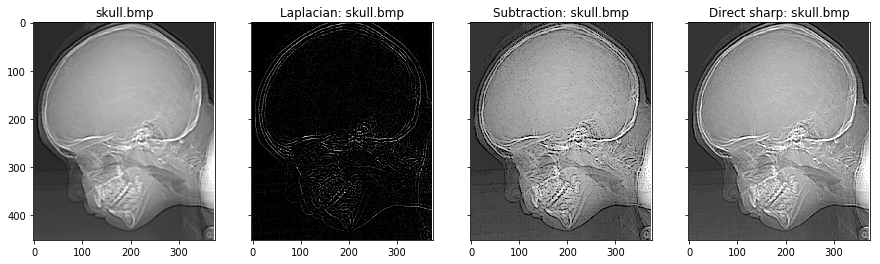

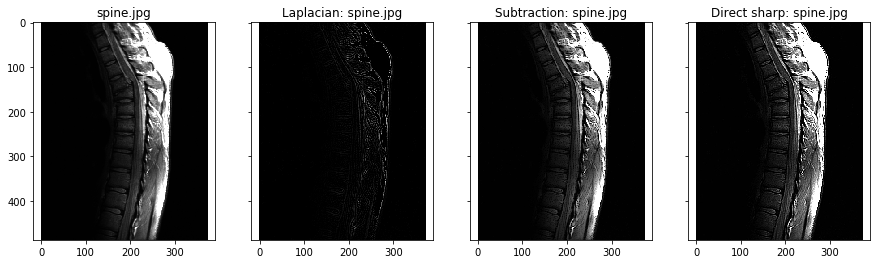

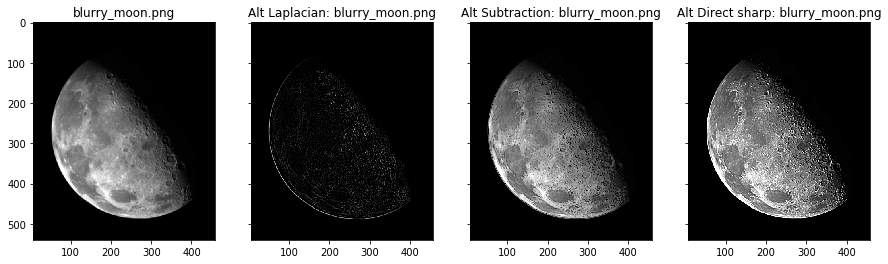

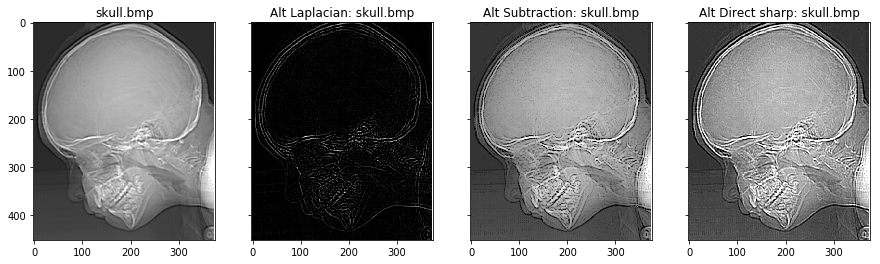

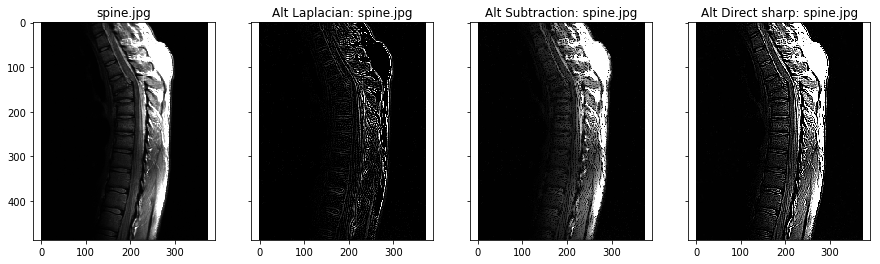

In [2]:
# Images to work with
im_set = [1, 16, 17]
imgs = [rg(files[i]) for i in im_set]


def lapFilter(img, kernel):
    return cv2.filter2D(img, -1, kernel)

def directSharp(img):
    return lapFilter(img, np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]))

def directAltSharp(img):
    return lapFilter(img, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))

def printLine(ax, index):
    ax[0].imshow(imgs[index], cmap='gray')
    ax[0].set_title(files[im_set[index]])
    
    ax[1].imshow(lap_img[index], cmap='gray')
    ax[1].set_title('Laplacian: ' + files[im_set[index]])
    
    ax[2].imshow(img_sub_sharp[index], cmap='gray')
    ax[2].set_title('Subtraction: ' + files[im_set[index]])
    
    ax[3].imshow(sh_img[index], cmap='gray')
    ax[3].set_title('Direct sharp: ' + files[im_set[index]])
    
def printAltLine(ax, index):
    ax[0].imshow(imgs[index], cmap='gray')
    ax[0].set_title(files[im_set[index]])
    
    ax[1].imshow(alt_lap_img[index], cmap='gray')
    ax[1].set_title('Alt Laplacian: ' + files[im_set[index]])
    
    ax[2].imshow(alt_img_sub_sharp[index], cmap='gray')
    ax[2].set_title('Alt Subtraction: ' + files[im_set[index]])
    
    ax[3].imshow(alt_sh_img[index], cmap='gray')
    ax[3].set_title('Alt Direct sharp: ' + files[im_set[index]])
    
def LaplacianPostProcessing(img):
    img -= min(img.flatten())
    img = img*255./max(img.flatten())
    img = img.astype("int")
    return img

# Laplacian Filter
kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]], dtype=np.float)

# Indirect image sharpening using normal Laplacian kernel
lap_img = [lapFilter(img, kernel) for img in imgs]

# The laplacian can not be subtracted directly given that its intensity scale is different from
# that of the original image, the following is a solution found here: 
# http://www.idlcoyote.com/ip_tips/sharpen.html
# Basically is a scale transformation
lap_img = [LaplacianPostProcessing(img) for img in lap_img]

# Sharpening by subtraction
img_sub_sharp = [np.subtract(orig, lap) for orig, lap in zip(imgs, lap_img)]

# The subtraction can yield negative values, to fix that a transformation should be used
# the simplest one is abs
img_sub_sharp = [np.absolute(img) for img in img_sub_sharp]

# Direct Sharpening
sh_img = [directSharp(img) for img in imgs]

# Sharpening using alternative kernel
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]], dtype=np.float)

alt_lap_img = [lapFilter(img, kernel) for img in imgs]
alt_lap_img = [LaplacianPostProcessing(img) for img in alt_lap_img]

alt_img_sub_sharp = [np.subtract(orig, lap) for orig, lap in zip(imgs, alt_lap_img)]
alt_img_sub_sharp = [np.absolute(img) for img in alt_img_sub_sharp]

alt_sh_img = [directAltSharp(img) for img in imgs]

# Displaying results
if len(imgs) == 1:
    f, ax = mplt.subplots(1, 4,sharey=True, figsize=(15,4))
    printLine(ax, 0)
else:
    for i in range(0, len(imgs)):
        f, ax = mplt.subplots(1, 4,sharey=True, figsize=(15,4))
        printLine(ax, i)

# Displaying alternative results
if len(imgs) == 1:
    f, ax = mplt.subplots(1, 4,sharey=True, figsize=(15,4))
    printAltLine(ax, 0)
else:
    for i in range(0, len(imgs)):
        f, ax = mplt.subplots(1, 4,sharey=True, figsize=(15,4))
        printAltLine(ax, i)

## Problem 6

The gradient of an image is the two-dimensional vector

$\nabla \mathbf{f} = \left[ \begin{array}{c}G_x\\G_y\end{array} \right] 
=\left[ \begin{array}{c}\frac{\partial f}{\partial x}\\ \frac{\partial f}{\partial y} \end{array} \right]
$

1. Write a function that calculates the image gradients in the $x$ and $y$ directions. Use the following Sobel operators to compute the derivatives:
<table>
<tr>
<td>-1</td>
<td>-2</td>
<td>-1</td>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>
<tr>
<td>1</td>
<td>2</td>
<td>1</td>
</tr>
</table>
<table>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
<tr>
<td>-2</td>
<td>0</td>
<td>2</td>
</tr>
<tr>
<td>-1</td>
<td>0</td>
<td>1</td>
</tr>
</table>
The function should output two variables, $G_x$ and $G_y$, which correspond to the derivatives in the $x$ and $y$ directions. Visualize the resulting gradients. Analyze the results obtained. How can you interpret the gradient operators?

2. Write another function that computes the gradient magnitude of an image. Recall that the magnitude of the gradient vector can be computed by:<br>
$\nabla f = \text{mag}(\nabla \mathbf{f}) = \left[ G_x^2 + G_y^2 \right]^\frac{1}{2}$.

3. Write another function that computes an approximation of the gradient magnitude using the following equation: <br>
$\nabla f \approx |G_x| + |G_y|$. <br>
Visualize and compare the resulting gradient magnitudes computed using both methods. How can you interpret the gradient magnitude?

You may use the images <tt>contact_lens_original.png</tt> and <tt>face.png<tt> to test your algorithms.


(Discuss your results after looking at the resulting images) Analyze the results you obtained.How can you interpret the gradient operators? How can you interpret the gradient magnitude?

### Analysis

This problem has two variants, we have attempted to solve both. The first variant is extremely simple and reduces to call OpenCV `filter2D` over the two kernels (for Gx and Gy) and then add the absolute value of each of them. The second variant would be equally simple, if not for the fact that the resulting image is completly unsuable as is. For such a reason post processing was required; in this case we recreated a canny filter (`cv2.Canny`), though slow and bad. The steps for constructing such filter is a tutorial from OpenCV Tutorials (links in the code), it reduces to calculate the Gradient (as we already did), then calculate the phase of each gradient. Using the gradient magnitude result and the angle result we can filter many pixels that were detected erroneously as borders (more detailed description in code); after this filter we can, further filter by thresholding the image using a low and high limit. Those pixels below low limit are erased, the pixels within the two limits are considered if they are attached to an upper limit pixel.

The gradient magnitude can be interpreted as the dominant percentage of a pixel in a given direction: for Gx and Gy the pixels are compared with each other in a given direction and are assigned a value that means how much of a global maxima they are in that direction.

Regarding the two methods used, the easy method is recommended whenever possible (or simply use OpenCV `Canny` function, that already implements both versions).

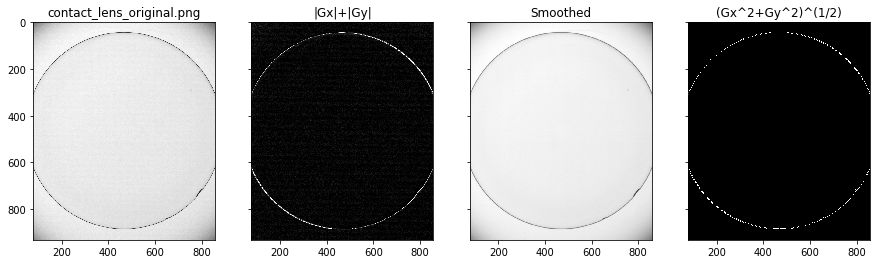

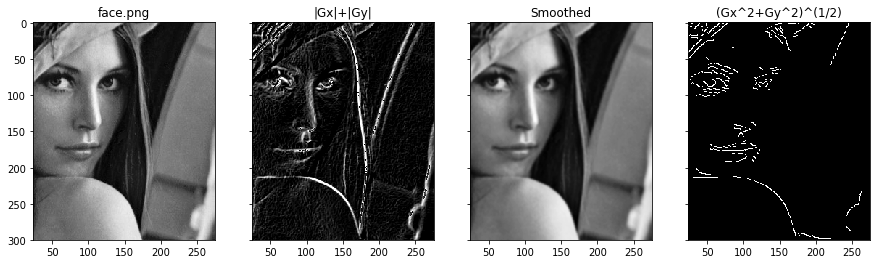

In [3]:
# Images to work with
im_set = [5, 7]
imgs = [rg(files[i]) for i in im_set]

sobel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_y = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
])

def printLine(ax, index):
    ax[0].imshow(imgs[index], cmap='gray')
    ax[0].set_title(files[im_set[index]])
    
    ax[1].imshow(simple_g[index], cmap='gray')
    ax[1].set_title('|Gx|+|Gy|')
    
    ax[2].imshow(img_smt[index], cmap='gray')
    ax[2].set_title('Smoothed')
    
    ax[3].imshow(edges_f[index], cmap='gray')
    ax[3].set_title('(Gx^2+Gy^2)^(1/2)')

def sobelDirectionalFilter(img, operator):
    return cv2.filter2D(img, -1, operator)

def getGradients(img):
    Gx = sobelDirectionalFilter(img, sobel_x)
    Gy = sobelDirectionalFilter(img, sobel_y)
    return Gx, Gy

def roundAngles(mat):
    w,h = mat.shape
    for i in range(w):
        for j in range(h):
            a = mat[i,j]
            if (a < 22.5 and a >= 0 or
                a > 157.5 and a < 202.5 or
                a > 337.5 and a <= 360):
                mat[i,j] = 0
            elif (a >= 22.5 and a < 67.5 or
                  a >=202.5 and a < 247.5):
                mat[i,j] = 45
            elif (a >= 67.5 and a < 112.5 or
                  a >= 247.5 and a < 292.5):
                mat[i,j] = 90
            else:
                mat[i,j] = 135
    return mat

def nonMaximaRemover(angle, edge):
    w, h = angle.shape
    edge_c = edge.copy()
    
    # In theory we do this: check the gradient angle, if it is 0 the pixel must be greater than
    # those above and below him (the direction is normal to the edge), if it is 45, we check the
    # other diagonal, same with the other cases.
    # It is evident that we need to avoid the image borders
    for i in range(1, w-1):
        for j in range(1, h-1):
            if angle[i,j] == 0:
                if edge[i,j] <= edge[i,j+1] or edge[i,j] <= edge[i,j-1]:
                    edge_c[i,j] = 0
            elif angle[i,j] == 45:
                if edge[i,j] <= edge[i-1,j-1] or edge[i,j] <= edge[i+1,j+1]:
                    edge_c[i,j] = 0
            elif angle[i,j] == 90:
                if edge[i,j] <= edge[i+1,j] or edge[i,j] <= edge[i-1,j]:
                    edge_c[i,j] = 0
            else:
                if edge[i,j] <= edge[i-1,j+1] or edge[i,j] <= edge[i+1,j-1]:
                    edge_c[i,j] = 0
    return edge_c
                    
def edgeThreshold(mat, t_high=0.2, t_low=0.1):
    maxi = np.max(mat)
    t_high *= maxi
    t_low *= maxi
    
    low_f_mat = mat.copy()
    high_f_mat = mat.copy()
    
    # Filter lower than min
    lower_index = low_f_mat < t_low
    low_f_mat[lower_index] = 0
    
    # Filter lower than greater
    high_index = high_f_mat < t_high
    
    high_f_mat[high_index] = 0
    high_index = high_f_mat >= t_high
    high_f_mat[high_index] = 1
    
    # Walk the matrix
    w, h = high_f_mat.shape
    for i in range(1, w-1):
        for j in range(1, h-1):
            if high_f_mat[i][j]:
                high_f_mat[i][j]=1
                walkMatrix(i, j, high_f_mat, low_f_mat, w, h)
    return high_f_mat
    
def walkMatrix(i, j, high_f_mat, low_f_mat, w, h):
    x = [-1, 0, 1, -1, 1, -1, 0, 1]
    y = [-1, -1, -1, 0, 0, 1, 1, 1]
    if i+1 < w and j+1 < h and i-1 > -1 and j-1 > -1:
        for k in range(8):
            if high_f_mat[i+x[k]][j+y[k]]==0 and low_f_mat[i+x[k]][j+y[k]]!=0:
                high_f_mat[i+x[k]][j+y[k]]=1
                walkMatrix(i+x[k], j+y[k], high_f_mat, low_f_mat, w, h)

    
    
# Generate gradients for all images
Gx, Gy = zip(*[getGradients(img) for img in imgs])

# Gradient using simple method
simple_g = [np.abs(gx) + np.abs(gy) for gx, gy in zip(Gx, Gy)]


# ******************************
# ******************************
# GRADIENT USING HARDCORE METHOD
# ******************************
# ******************************
# Using only the gradient magnitude throws a noisy unusable image
# so, a canny filter was emulated
# Method steps: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
# Special credits:
# https://github.com/rishimukherjee/Canny-Python/blob/master/canny-slow.py

# This method is susceptible to noise so we apply Gaussian Smoothing right away
img_smt = [cv2.GaussianBlur(img,(5,5),0) for img in imgs]
img_smt = [img/255.0 for img in img_smt]

# Extract new gradients
Gx, Gy =  zip(*[getGradients(img) for img in img_smt])

# We need both magnitud and phase
edges = [np.power(np.add(np.power(gx,2),np.power(gx,2)), 0.5) for gx, gy in zip(Gx, Gy)]
phase = [np.arctan2(gx,gy)*180./np.pi for gx, gy in zip(Gx, Gy)]
phase = [p.astype('int') for p in phase]

# We only care about 4 axis of gradient directions: horizontal, vertical and two diagonals
phase = [roundAngles(p) for p in phase]

# Using both the gradient edge matrix and the direction matrix, compute the local maximas in the image
# those pixels that are local maximas will be let be, others will be set to zero.
# Filtered edges
edges_f = [nonMaximaRemover(p, e) for p, e in zip(phase, edges)]

# Now we threshold the image based in supremely arbitrary values
edges_f = [edgeThreshold(e, 0.2, 0.1) for e in edges_f]


# Displaying results
if len(imgs) == 1:
    f, ax = mplt.subplots(1, 4,sharey=True, figsize=(15,4))
else:
    for i in range(0, len(imgs)):
        f, ax = mplt.subplots(1, 4,sharey=True, figsize=(15,4))
        printLine(ax, i)